In [1]:
import os
import cv2
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import numpy as np
import torch
from skimage import feature


#from termcolor import colored
from torch.utils.data import TensorDataset, Dataset, DataLoader


In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/My Drive/Histopathology data/smalldata.zip" "smalldata.zip"

In [5]:
!unzip -q smalldata.zip

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
with open('smalldata/files_list.txt', 'r') as fp:
    files = fp.read().splitlines()
classes_str = [file.split('/')[0] for file in files]
classes_str, classes = np.unique(classes_str, return_inverse=True)
print(classes_str)
train_files, test_files, train_classes, test_classes = train_test_split(files, classes, train_size=0.7, test_size=0.3, stratify=classes)

['NORM' 'TUM']


In [7]:
import matplotlib.pyplot as plt
import cv2, os 
import numpy as np
dir_images = "smalldata/"
imgs=[]
for f in train_files:
  s=dir_images+f
  imgs.append(s)
imgs1=[]
for f in test_files:
  s=dir_images+f
  imgs1.append(s)

In [8]:
print(len(train_files))
print(len(imgs))
print(len(test_files))

2240
2240
960


In [9]:
def getLBPimage(image):

    #Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            # 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()

            #Binary operation
            img01_vector = np.delete(img01_vector,4)
            #Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

In [10]:
import pandas as pd


hist_list=[]
labels=[]
i=0
for imgnm in imgs:
    i+=1
    if i%500==0:
      print(i)
    image = plt.imread(imgnm)
    
    imgLBP    = getLBPimage(image)
    vecimgLBP = imgLBP.flatten() 
    hist,bins=np.histogram(vecimgLBP,bins=2**8)
    hist_list.append(hist)
    
hist=np.array(hist_list)
print(np.shape(hist))  

df = pd.DataFrame(hist)  


500
1000
1500
2000
(2240, 256)


In [11]:
Y=[]
for c in train_classes:
  Y.append(c)
Y=np.array(Y)

y=[]
for c in test_classes:
  y.append(c)
y=np.array(y)

print(Y)

[1 0 1 ... 0 1 1]


In [12]:

hist_list=[]
labels1=[]
for imgnm in imgs1:
    image = plt.imread(imgnm)
    
    imgLBP    = getLBPimage(image)
    vecimgLBP = imgLBP.flatten() 
    hist,bins=np.histogram(vecimgLBP,bins=2**8)
    hist_list.append(hist)
hist1=np.array(hist_list)
print(np.shape(hist1))  
df1 = pd.DataFrame(hist1)  


(960, 256)


In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(df, Y)

SVC(kernel='linear')

In [14]:
y_pred = clf.predict(df1)

In [15]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y, y_pred)

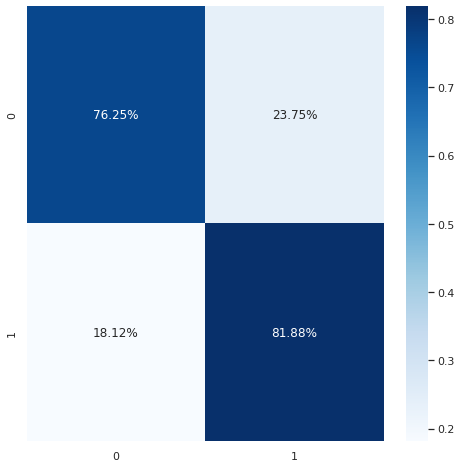

In [16]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 8)})
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y, y_pred)
print(acc_score)

0.7645833333333333
